In [1]:
########## intro to bird migration
import pandas as pd
BirdData = pd.read_csv("/home/yuvraj/Documents/bird_tracking.csv")

In [2]:
BirdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [3]:
BirdData.altitude[:12]

0      71
1      68
2      68
3      73
4      69
5      54
6      57
7      65
8      59
9     107
10     61
11     56
Name: altitude, dtype: int64

In [4]:
BirdData.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [5]:
BirdData.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


In [6]:
BirdData[:1]

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.15,Eric


In [7]:
############ simple plotting if data
import matplotlib.pyplot as plt
import numpy as np

In [8]:
ix = BirdData.bird_name == "Eric"

In [9]:
x,y = BirdData.longitude[ix],BirdData.latitude[ix]

In [10]:
ix.shape

(61920,)

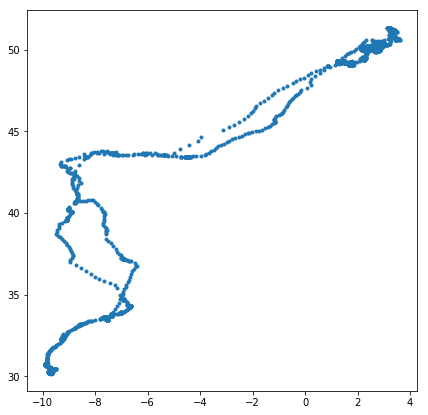

In [11]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")
plt.savefig("Comprassion.pdf")

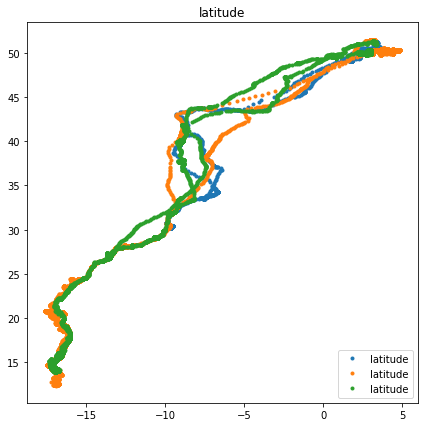

In [12]:
bird_name=pd.unique(BirdData.bird_name)
plt.figure(figsize=(7,7))
for bird in bird_name:
    ix = BirdData.bird_name == bird
    x,y = BirdData.longitude[ix],BirdData.latitude[ix]
    plt.plot(x,y,".")
plt.title("langitute")
plt.title("latitude")
plt.legend(loc="lower right")
plt.savefig("CollectiveData.pdf")
    

In [13]:
########### Examining Flight Speed
ix = BirdData.bird_name == "Eric"
speed = BirdData.speed_2d[ix]

In [14]:
np.sum(speed.isna())

85

In [15]:
ind = np.isnan(speed)

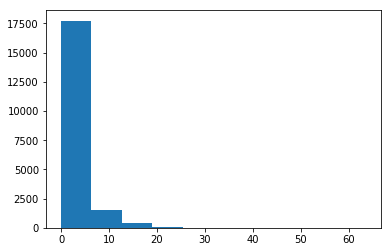

In [16]:
plt.hist(speed[~ind]);
plt.savefig("BirdSpeedHist.pdf")

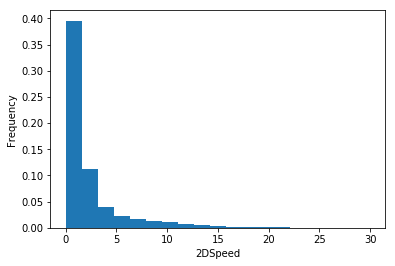

In [17]:
ix = BirdData.bird_name == "Eric"
speed = BirdData.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind],bins=np.linspace(0,30,20),density=True);
plt.xlabel("2DSpeed")
plt.ylabel("Frequency");


In [18]:
######## Using Datetime
import datetime
datetime.datetime.today()

datetime.datetime(2018, 11, 21, 15, 22, 55, 446407)

In [19]:
BirdData.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [20]:
xval = datetime.datetime.today()
yval = datetime.datetime.today()
yval-xval

datetime.timedelta(microseconds=86)

In [21]:
date_str=BirdData.date_time[0]
date_str[0:-3]

'2013-08-15 00:18:08'

In [22]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [23]:
timestamp=[]
for i in range(len(BirdData)):
    timestamp.append(datetime.datetime.strptime(BirdData.date_time.iloc[i][0:-3],"%Y-%m-%d %H:%M:%S"))

In [24]:
timestamp[0:4]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51)]

In [25]:
BirdData["timestamp"] = pd.Series(timestamp,index=BirdData.index)

In [26]:
BirdData.head()
BirdData.timestamp[4]-BirdData.timestamp[3]

Timedelta('0 days 00:29:51')

In [27]:
times=BirdData.timestamp[BirdData.bird_name=="Eric"]
elapsed_time = [time-times[0] for time in times]

In [28]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [29]:
print(elapsed_time[3])
print(elapsed_time[1000])

0 days 01:29:43
12 days 02:02:00


In [30]:
elapsed_time[1000]/datetime.timedelta(hours=1)

290.03333333333336

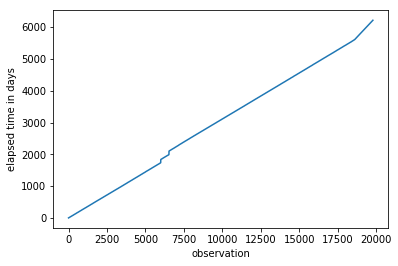

In [31]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(hours=1) )
plt.xlabel("observation")
plt.ylabel("elapsed time in days")
plt.savefig("elapsed_time.pdf")

In [32]:
############# calculating daily mean speed
data = BirdData[BirdData.bird_name=="Eric"]
times=data.timestamp
elapsed_time = [time -times[0] for time in times]
#print(type(np.array(elapsed_time)))
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

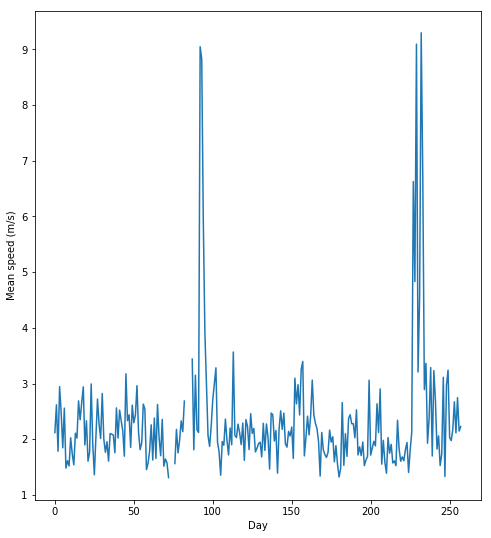

In [33]:
next_day = 1
inds =[]
daily_mean_speed=[]
for (i,t) in enumerate(elapsed_days):
    if t<next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day+=1
        inds=[]
plt.figure(figsize=(8,9))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.savefig("meanspeed.pdf")

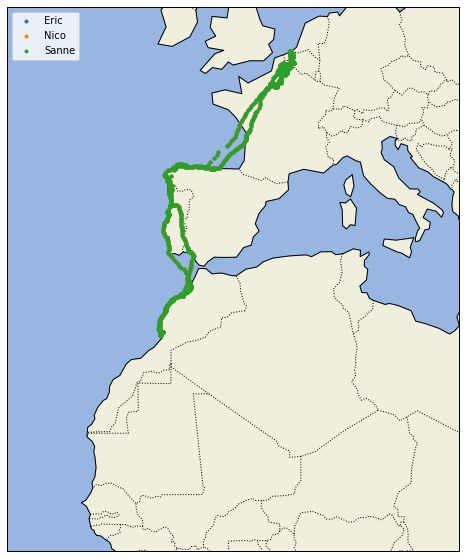

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,linestyle=":")

for name in bird_name:
    xi = BirdData['bird_name'] == name
    x,y = BirdData.longitude[ix],BirdData.latitude[ix]
    ax.plot(x,y,".",transform = ccrs.Geodetic(),label=name)
plt.legend(loc="upper left")
plt.savefig("map.pdf")